In [4]:
! kaggle datasets download -d mlg-ulb/creditcardfraud

 74% 49.0M/66.0M [00:01<00:00, 32.4MB/s]
100% 66.0M/66.0M [00:01<00:00, 56.8MB/s]


In [5]:
!ls

creditcardfraud.zip  gdrive  sample_data


In [6]:
#unzipping the zip files and deleting the zip files
!unzip \*.zip  && rm *.zip

Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


In [7]:
import pandas as pd
import numpy as np
%matplotlib inline
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [8]:
# load data
cc_data = pd.read_csv("creditcard.csv")
cc_data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [9]:
# Check null values in the data
cc_data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [10]:
print("Total number of colunms in the dataset",cc_data.shape[0])
print("Length of the dataset",cc_data.shape[1])


Total number of colunms in the dataset 284807
Length of the dataset 31


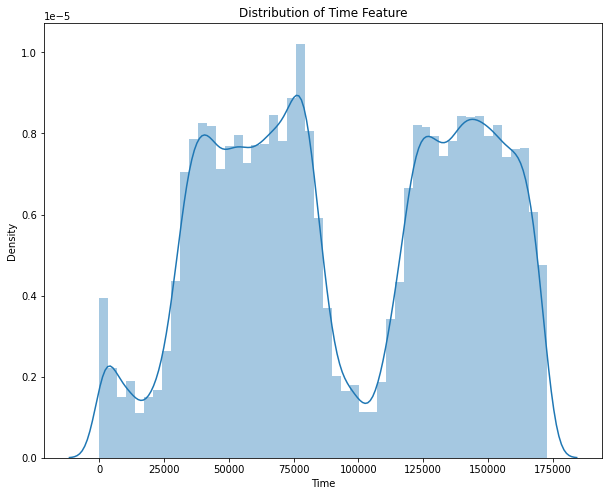

In [11]:
#visualizations of time and amount
plt.figure(figsize=(10,8))
plt.title('Distribution of Time Feature')
sns.distplot(cc_data.Time)

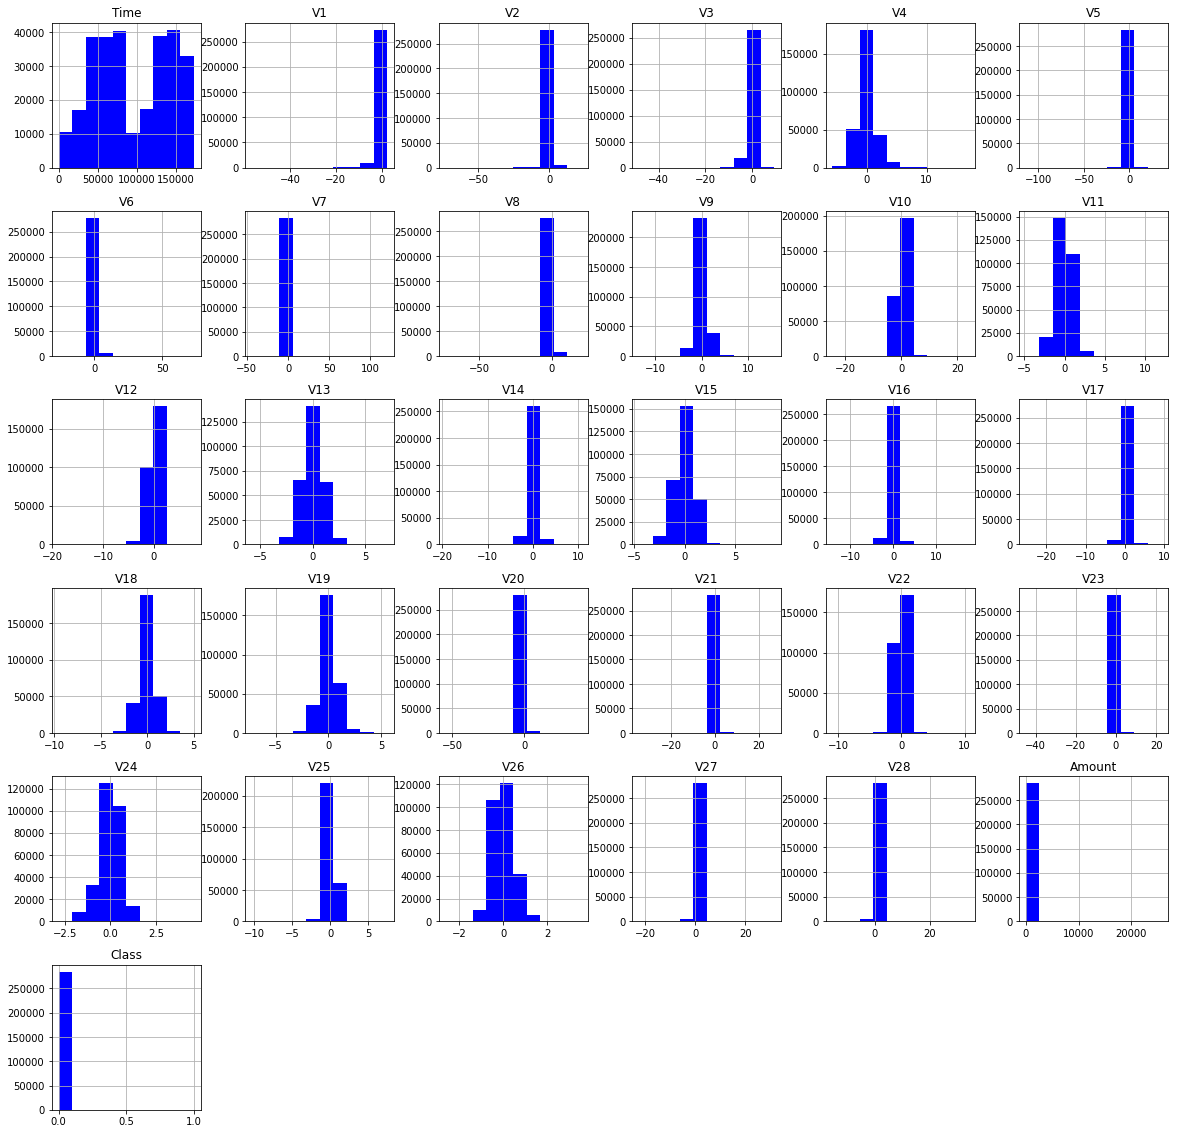

In [12]:
histogram = cc_data.hist(figsize = (20,20), color = "blue")

In [13]:
cc_data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [14]:
#  Dataset is highly imbalanced. So we try to balance dataset before doing ML application
output_class = cc_data.Class.value_counts()
normal = output_class[0]
fraudulent = output_class[1]
normal_percent = (normal/(normal+fraudulent))*100
fraudulent_percent = (fraudulent/(normal+fraudulent))*100
print('Total non-fraudulent transactions are {} which is about {:.2f}% and total fraudulent transactions are {} about {:.2f}%.'.format(normal, normal_percent, fraudulent, fraudulent_percent))

Total non-fraudulent transactions are 284315 which is about 99.83% and total fraudulent transactions are 492 about 0.17%.


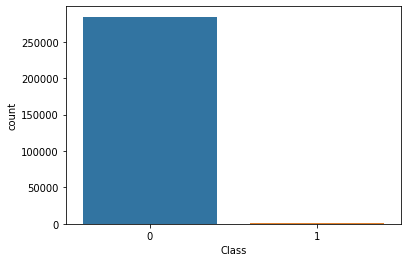

In [15]:
sns.countplot(x='Class', data=cc_data)
plt.show()

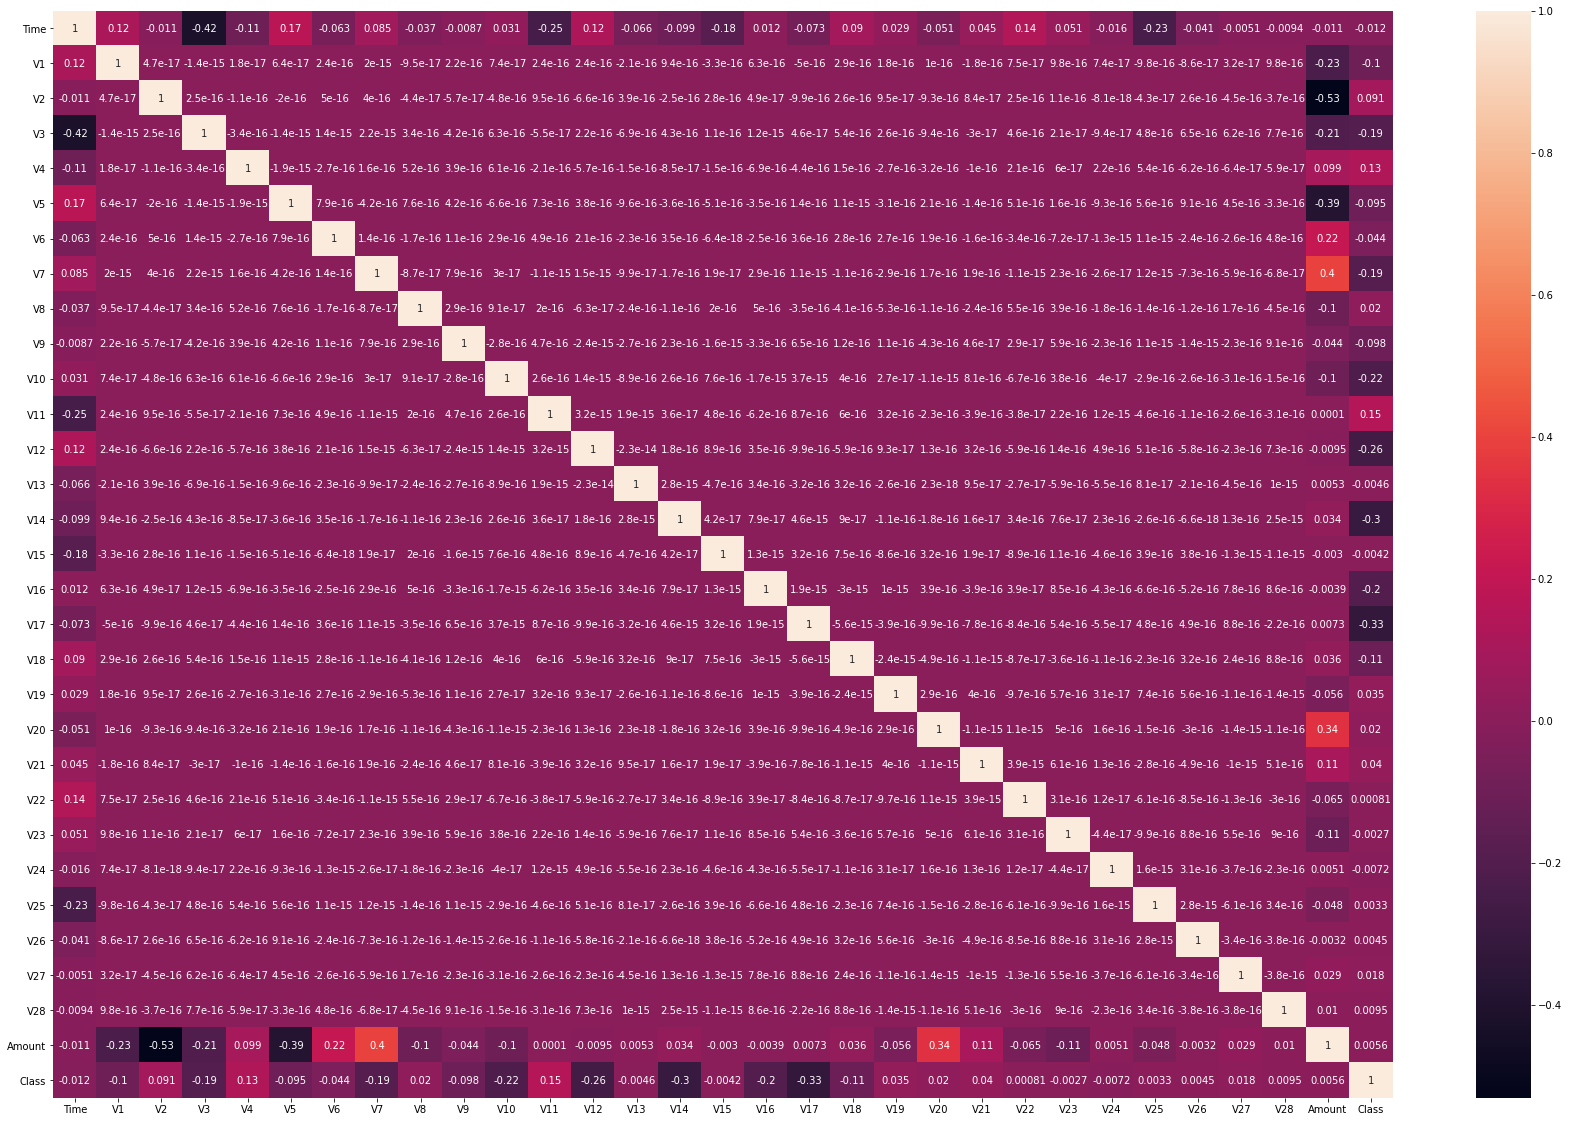

In [16]:
corr_data= cc_data.corr()
fig, axes = plt.subplots(figsize=(30,20))
sns.heatmap(corr_data,annot=True)

In [17]:
data_corr = cc_data.select_dtypes(exclude="object")
corr = data_corr.corr()

In [18]:
Num_feature = corr["Class"].sort_values(ascending=False).head(20).to_frame()

cm = sns.light_palette("orange", as_cmap=True)
style = Num_feature.style.background_gradient(cmap=cm)
style

,Class
Class,1.000000
V11,0.154876
V4,0.133447
V2,0.091289
V21,0.040413
V19,0.034783
V20,0.020090
V8,0.019875
V27,0.017580
V28,0.009536


**Balancing Imbalanced Dataset using Random Under Sampling and SMOTE**

In [19]:
X = cc_data.drop(['Class'], axis = 1)
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99


In [20]:
y = cc_data['Class']
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

**RandomOverSampler**

In [21]:
# Using oversampling technique for imbalanced dataset
from imblearn.over_sampling import RandomOverSampler 

ros = RandomOverSampler(random_state=0)
X_res, y_res = ros.fit_resample(X,y)

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0: 284315, 1: 284315})


**Synthetic Minority Oversampling Technique (SMOTE)**

In [22]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=0)
X_smote, y_smote = smote.fit_resample(X,y)

from collections import Counter
print('Resampled dataset shape %s' % Counter(y_smote))


Resampled dataset shape Counter({0: 284315, 1: 284315})


In [23]:
# # new_counts = cc_data.Class.value_counts()
# plt.figure(figsize=(8,6))
# sns.barplot(x=Counter(X_res), y=Counter(y_res))
# plt.title('Count of Fraudulent vs. Non-Fraudulent Transactions In Subsample')
# plt.ylabel('Count')
# plt.xlabel('Class (0:Non-Fraudulent, 1:Fraudulent)')

**Machine Learning Models**

In [14]:
pip install scikit-plot

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder 

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,make_scorer
from sklearn.metrics import roc_curve
import scikitplot as skplt

In [27]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(X_res))

In [28]:
# label_encoder object knows how to understand word labels. 
class_le = LabelEncoder() 
y = class_le.fit_transform(y_res)
y

array([0, 0, 0, ..., 1, 1, 1])

In [29]:
X_train, X_test,y_train, y_test = train_test_split(X_res, y_res, test_size=0.2, random_state=40)

In [30]:
# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

import collections

classifiers = {"Logistic Regression":LogisticRegression(),
               "KNearest":KNeighborsClassifier(p=1),
               "RandomForestClassifier":RandomForestClassifier(max_depth=5),
               "AdaBoostClassifier":AdaBoostClassifier(),
               "GaussianNB":GaussianNB(),
               "XGBoost": XGBClassifier(),
              #  "SVM": SVC(),
               "DecisionTree": DecisionTreeClassifier()}

Models: LogisticRegression 93.8 Accuracy score
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     57074
           1       0.96      0.91      0.94     56652

    accuracy                           0.94    113726
   macro avg       0.94      0.94      0.94    113726
weighted avg       0.94      0.94      0.94    113726

Confusion Matrix:
[[54842  2232]
 [ 4832 51820]]


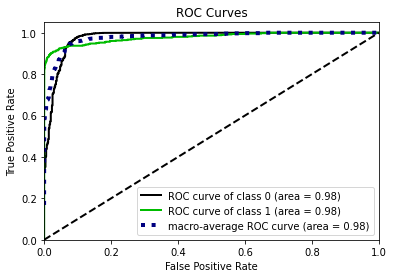

Models: KNeighborsClassifier 100.0 Accuracy score
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57074
           1       1.00      1.00      1.00     56652

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[57019    55]
 [    0 56652]]


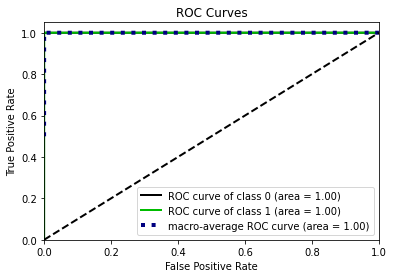

Classification Report
              precision    recall  f1-score   support

           0       0.92      1.00      0.96     57074
           1       1.00      0.92      0.95     56652

    accuracy                           0.96    113726
   macro avg       0.96      0.96      0.96    113726
weighted avg       0.96      0.96      0.96    113726

Confusion Matrix:
[[56866   208]
 [ 4810 51842]]


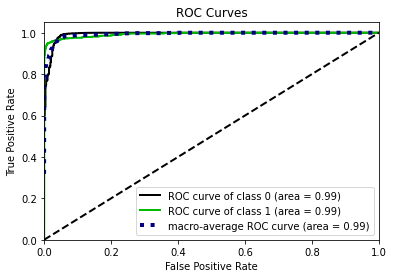

Models: AdaBoostClassifier 96.5 Accuracy score
Classification Report
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     57074
           1       0.98      0.95      0.96     56652

    accuracy                           0.97    113726
   macro avg       0.97      0.97      0.97    113726
weighted avg       0.97      0.97      0.97    113726

Confusion Matrix:
[[55929  1145]
 [ 2817 53835]]


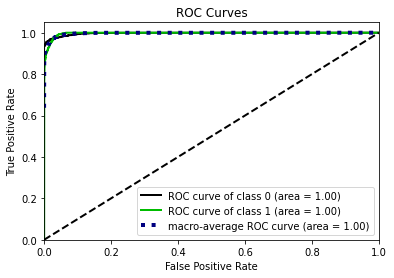

Models: GaussianNB 86.4 Accuracy score
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.99      0.88     57074
           1       0.99      0.74      0.84     56652

    accuracy                           0.86    113726
   macro avg       0.89      0.86      0.86    113726
weighted avg       0.89      0.86      0.86    113726

Confusion Matrix:
[[56493   581]
 [14942 41710]]


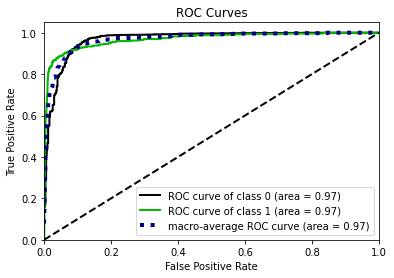

Models: XGBClassifier 99.3 Accuracy score
Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     57074
           1       0.99      0.99      0.99     56652

    accuracy                           0.99    113726
   macro avg       0.99      0.99      0.99    113726
weighted avg       0.99      0.99      0.99    113726

Confusion Matrix:
[[56573   501]
 [  318 56334]]


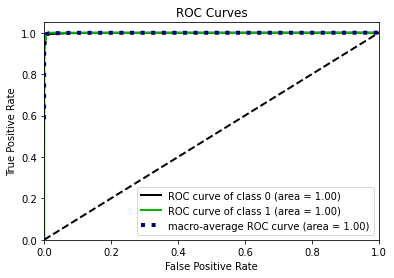

Models: DecisionTreeClassifier 100.0 Accuracy score
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     57074
           1       1.00      1.00      1.00     56652

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

Confusion Matrix:
[[57050    24]
 [    0 56652]]


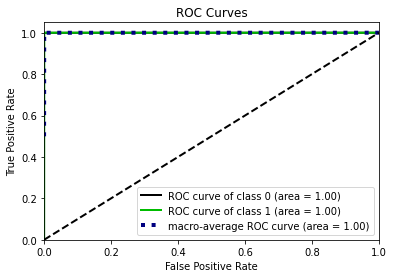

In [32]:
for key,classifier in classifiers.items():
    clf = classifier.fit(X_train,y_train)
    print("Models:",classifier.__class__.__name__, (round(clf.score(X_test, y_test), 3))*100,"Accuracy score")
    pred = clf.predict(X_test)

    print("Classification Report")
    print(classification_report(y_test, pred))

    print("Confusion Matrix:")
    print(confusion_matrix(y_test, pred))    

    # Roc curve
    skplt.metrics.plot_roc(y_test, classifier.predict_proba(X_test), plot_micro = False)
    plt.show()

**AutoEncoders**

In [16]:
cc_data['Time'] = StandardScaler().fit_transform(cc_data['Time'].values.reshape(-1, 1))
cc_data['Amount'] = StandardScaler().fit_transform(cc_data['Amount'].values.reshape(-1, 1))

**Training on non-fraudulent transactions**

In [18]:
X_train, X_test = train_test_split(cc_data,test_size = 0.2,random_state=42)
X_train = X_train[X_train.Class == 0] 
X_train = X_train.drop(['Class'], axis=1) 


y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis=1)

In [21]:
from keras.models import Model, load_model
from keras.layers import Input, Dense
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers
import tensorflow as tf

**Model**

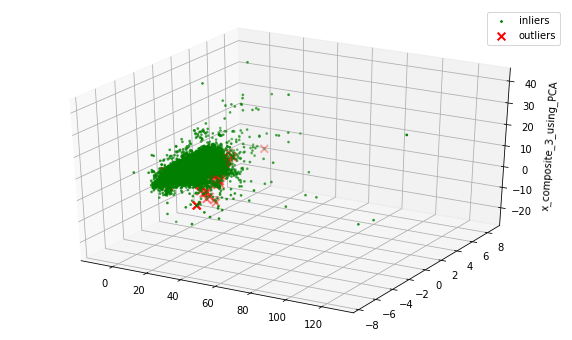

In [63]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
pca = PCA(n_components=3)  #Considered only 3 components to put into 3 dimensions
to_model_cols = cc_data.columns[0:30]
outliers = cc_data.loc[cc_data['Class']==1]
outlier_index=list(outliers.index)
scaler = StandardScaler()
X = scaler.fit_transform(cc_data[to_model_cols])
X_reduce = pca.fit_transform(X)
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_PCA")
# Plotting compressed data points
ax.scatter(X_reduce[:, 0], X_reduce[:, 1], zs=X_reduce[:, 2], s=3, lw=1, label="inliers",c="green")
# Plot x for the ground truth outliers
ax.scatter(X_reduce[outlier_index,0],X_reduce[outlier_index,1], X_reduce[outlier_index,2],
           s=60, lw=2, marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [57]:
from sklearn.manifold import TSNE
standardized_data = StandardScaler().fit_transform(cc_data)
data = standardized_data[0:50000]
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=250)
reduced_data = tsne.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 50000 samples in 0.344s...
[t-SNE] Computed neighbors for 50000 samples in 332.317s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50000
[t-SNE] Computed conditional probabilities for sample 2000 / 50000
[t-SNE] Computed conditional probabilities for sample 3000 / 50000
[t-SNE] Computed conditional probabilities for sample 4000 / 50000
[t-SNE] Computed conditional probabilities for sample 5000 / 50000
[t-SNE] Computed conditional probabilities for sample 6000 / 50000
[t-SNE] Computed conditional probabilities for sample 7000 / 50000
[t-SNE] Computed conditional probabilities for sample 8000 / 50000
[t-SNE] Computed conditional probabilities for sample 9000 / 50000
[t-SNE] Computed conditional probabilities for sample 10000 / 50000
[t-SNE] Computed conditional probabilities for sample 11000 / 50000
[t-SNE] Computed conditional probabilities for sample 12000 / 50000
[t-SNE] Computed conditional probabilities for 

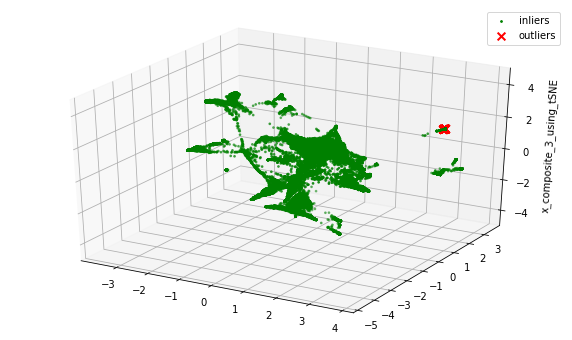

In [64]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("x_composite_3_using_tSNE")
# Plotting the compressed data points
ax.scatter(reduced_data[:, 0], reduced_data[:, 1], zs=reduced_data[:, 2], s=3, lw=1, label="inliers",c="green")
# Plot x(s) for the ground truth outliers
out_index = [i for i in outlier_index if i <= 50000]
ax.scatter(reduced_data[out_index,0],reduced_data[out_index,1], reduced_data[out_index,2], lw=2, s=60, 
           marker="x", c="red", label="outliers")
ax.legend()
plt.show()

In [23]:
input_dim = X_train.shape[1]
encoding_dim = int(input_dim / 2) - 1
hidden_dim = int(encoding_dim / 2)
learning_rate = 1e-7

# Input layer
input_layer = Input(shape=(input_dim,))

# Enoder
encoder = Dense(14, activation="tanh", activity_regularizer=regularizers.l1(learning_rate))(input_layer)
encoder = Dense(7, activation="relu")(encoder)

# Decoder
decoder = Dense(7, activation='tanh')(encoder)
decoder = Dense(14, activation='relu')(decoder)

# Output layer
#  autoencoder = Model(inputs=input_layer, outputs=decoder)
output_layer = Dense(input_dim, activation='relu')(decoder)


In [29]:
epoch = 100
batch_size = 128

autoencoder = Model(input_layer, output_layer)
autoencoder.compile(metrics=['accuracy'],optimizer="adam", loss="mse")

In [30]:
cp = ModelCheckpoint(filepath="autoencoder_fraud.h5",
                               save_best_only=True,
                               verbose=0)

tb = TensorBoard(log_dir='./logs',
                histogram_freq=0,
                write_graph=True,
                write_images=True)

history = autoencoder.fit(X_train, X_train,
                    epochs= epoch,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(X_test, X_test),
                    verbose=1,
                    callbacks=[cp, tb]).history

Epoch 1/100
1777/1777 [==============================] - 5s 2ms/step - loss: 0.9330 - accuracy: 0.3319 - val_loss: 0.8222 - val_accuracy: 0.5833
Epoch 2/100
1777/1777 [==============================] - 3s 2ms/step - loss: 0.7880 - accuracy: 0.5982 - val_loss: 0.7919 - val_accuracy: 0.6196
Epoch 3/100
1777/1777 [==============================] - 3s 2ms/step - loss: 0.7617 - accuracy: 0.6251 - val_loss: 0.7837 - val_accuracy: 0.6282
Epoch 4/100
1777/1777 [==============================] - 3s 2ms/step - loss: 0.7465 - accuracy: 0.6320 - val_loss: 0.7796 - val_accuracy: 0.6334
Epoch 5/100
1777/1777 [==============================] - 3s 2ms/step - loss: 0.7341 - accuracy: 0.6362 - val_loss: 0.7765 - val_accuracy: 0.6365
Epoch 6/100
1777/1777 [==============================] - 3s 2ms/step - loss: 0.7434 - accuracy: 0.6386 - val_loss: 0.7641 - val_accuracy: 0.6408
Epoch 7/100
1777/1777 [==============================] - 3s 2ms/step - loss: 0.7157 - accuracy: 0.6537 - val_loss: 0.7560 - val_ac

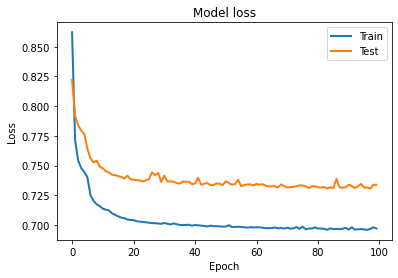

In [31]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [32]:
pred = autoencoder.predict(X_test)

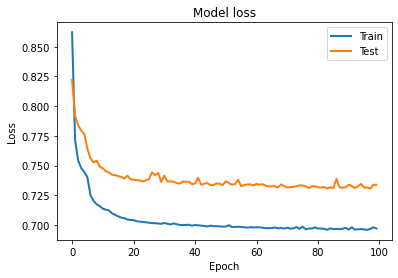

In [33]:
plt.plot(history['loss'], linewidth=2, label='Train')
plt.plot(history['val_loss'], linewidth=2, label='Test')
plt.legend(loc='upper right')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [34]:
pred_test = autoencoder.predict(X_test)

In [35]:
mse = np.mean(np.power(X_test - pred, 2), axis=1)
error_df = pd.DataFrame({'Reconstruction_error': mse,
                        'True_class': y_test})


In [36]:
error_df.Reconstruction_error.values

array([75.5311783 ,  0.87088175,  0.27477224, ...,  0.57461525,
        0.12088804,  1.59184403])

In [41]:
# Error thresholds for fraudulent transactions and legitimate transactions
threshold_fixed = 5 

pred_y = [1 if e > threshold_fixed else 0 for e in error_df.Reconstruction_error.values]
matrix = (confusion_matrix(error_df.True_class, pred_y))

In [49]:
TP = matrix[0][0]
FN = matrix[1][1]
FP = matrix[0][1]
TN = matrix[1][0]

Accuracy = str(np.round(100*float(TP+FN)/float(TP+FN + FP + TN),2))
print("Test Accuracy of the model is",Accuracy,"%")
print("Sensitivity of the model : {}".format(round(recall_score(error_df.True_class, pred_y), 2)))

Test Accuracy of the model is 98.78 %
Sensitivity of the model : 0.66


###### Reference: 

---


###### https://blogs.oracle.com/datasciencefraud-detection-using-autoencoders-in-keras-with-a-tensorflow-backend
###### https://www.kaggle.com/redaabdou/fraud-detection-solution-autoencoders-in-keras